                                     Title and context
                                     
Superstore Sales Analysis

Objective
Analyze Superstore sales data to identify:
- the best-performing categories
- sales trends
- useful insights for business decision-making

Dataset
- Source: Superstore dataset (Kaggle)
- Number of rows: 51,290
- Number of columns: 21


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Display configuration for graphics
plt.style.use('default')

In [97]:
#loading the dataset
df =pd.read_csv('../data/superstore.csv')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


                                                     Data Understanding

In [98]:
df.shape #for rows and columns number

(51290, 21)

In [99]:
#all columns
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [100]:
#columns type
df.dtypes

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

In [101]:
# Converting date columns to datetime, even if formats are mixed;
#so I used dayfirst and errors='coerce' for that in order to clean well errors and NaT data after in the dataset
for col in ['order_date','ship_date']:
    df[col] =pd.to_datetime(df[col], dayfirst=True, errors='coerce')

In [102]:
#check if all valid dates are converted correctly
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                     object
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

In [103]:
#descriptive statistics 
df.describe()

,order_date,ship_date,quantity,discount,profit,shipping_cost,year
count,20067,19834,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-02 23:06:58.179099904,2013-05-10 01:01:29.664212992,3.476545,0.142908,28.641740,26.375915,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2012-06-08 00:00:00,2012-06-11 00:00:00,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-02 00:00:00,2013-07-04 00:00:00,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-11 00:00:00,2014-06-01 00:00:00,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-12 00:00:00,2015-01-07 00:00:00,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,2.278766,0.212280,174.424113,57.296804,1.098931


                                                            Data Cleaning

In [104]:
#verify missing data/values
df.isna().sum()

order_id              0
order_date        31223
ship_date         31456
ship_mode             0
customer_name         0
segment               0
state                 0
country               0
market                0
region                0
product_id            0
category              0
sub_category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
year                  0
dtype: int64

In [105]:
#Delete missing values to avoid biased results later
df.dropna(inplace=True)

In [106]:
#verify 
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [107]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49967    False
49981    False
50012    False
50032    False
50053    False
Length: 13297, dtype: bool

                                                                    Sales Analysis

In [108]:
#sales type verification
df['sales'].dtype

dtype('O')

In [109]:
#Conversion to number, sales column is an object as type
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

In [110]:
df['sales'].dtype

dtype('float64')

In [111]:
#total sales analysis
total_sales = df['sales'].sum()
print(f"Total sales: {total_sales:,.2f}")

Total sales: 2,032,490.00


In [112]:
#sales by category
sales_by_category = df.groupby('category')['sales'].sum()
sales_by_category

category
Furniture          609362.0
Office Supplies    718953.0
Technology         704175.0
Name: sales, dtype: float64

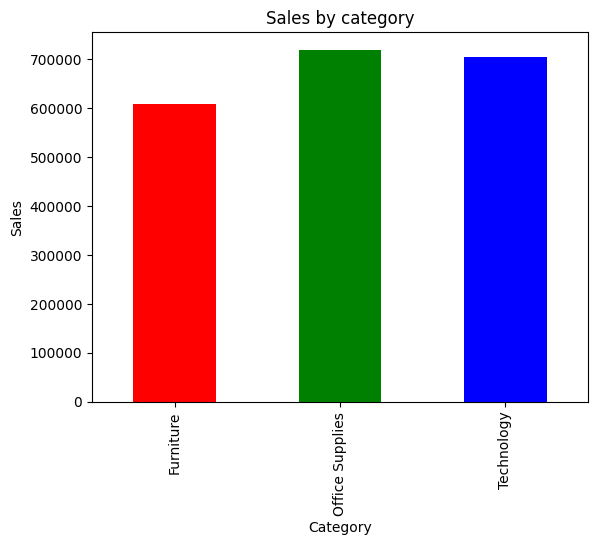

In [113]:
#visualization
colors=['red','green','blue']
sales_by_category.plot(kind='bar', title='Sales by category',color=colors)
plt.xlabel('Category')
plt.ylabel('Sales')
#To save the graphic
plt.savefig('../images/sales_by_category.png', bbox_inches='tight')
plt.show()

The best-performing category in terms of sales is Office Supplies.

 Interpretation

- The Office Supplies category generates the most sales.
- Furniture performs less well in terms of value.
This information can help guide marketing decisions.